In [3]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure includ‐
ing:

• A DESCR key describing the dataset

• A data key containing an array with one row per instance and one column per
feature

• A target key containing an array with the labels

In [4]:
mnist['DESCR']


"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

(70000, 784)
(1, 784)


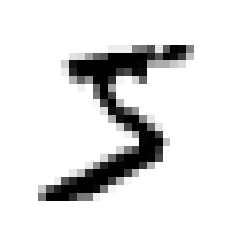

In [6]:
x= mnist["data"]
print(x.shape)
some_digit = x.head(1)

print(some_digit.shape)
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [7]:
y=mnist['target']
print(y.shape)
y.loc[0]

(70000,)


'5'

In [8]:
y=y.astype(int)

In [9]:
x_train, x_test, y_train, y_test = x.iloc[:60000], x.iloc[60000:], y.iloc[:60000], y.iloc[60000:]
print(x_train.shape)

(60000, 784)


In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)
# Stochastic Gradient Descent

SGDClassifier(random_state=42)

The SGDClassifier relies on randomness during training (hence
the name “stochastic”). If you want reproducible results, you
should set the random_state parameter.

This classifier has the advantage of being capable of handling very large datasets efficiently.
This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning), as we will see later

In [12]:
print(sgd_clf.predict(some_digit))

[ True]


In [13]:
from sklearn.model_selection import cross_val_score

In [15]:
#cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')


In [16]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    
 def fit(self, X, y=None):
    
 pass

 def predict(self, X):
        
 return np.zeros((len(X), 1), dtype=bool)

Can you guess this model’s accuracy? Let’s find out:
    
>>> never_5_clf = Never5Classifier()


>>> cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time.

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).

A much better way to evaluate the performance of a classifier is to look at the confu‐
sion matrix. The general idea is to count the number of times instances of class A are
classified as class B. For example, to know the number of times the classifier confused
images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion
matrix

In [17]:
from sklearn.model_selection import cross_val_predict

In [18]:
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,n_jobs=-1)

n_jobs means you ue all of your machine cores for faster evalutation

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Each row in a confusion matrix represents an actual class, while each column repre‐
sents a predicted class. The first row of this matrix considers non-5 images (the nega‐
tive class): 53,057 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 1,522 were wrongly classified as 5s (false positives).
The second row considers the images of 5s (the positive class): 1,325 were wrongly
classified as non-5s (false negatives), while the remaining 4,096 were correctly classi‐
fied as 5s (true positives). A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diago‐
nal (top left to bottom right)

In [20]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

precision =                
TP
--------
TP + FP

TP is the number of true positives, and FP is the number of false positives.

recall = 

TP

-------
TP + FN

FN is of course the number of false negatives.

In [21]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) 
print(recall_score(y_train_5, y_train_pred)) 

0.8370879772350012
0.6511713705958311


Now your 5-detector does not look as shiny as it did when you looked at its accuracy.
When it claims an image represents a 5, it is correct only 72.9% of the time. More‐
over, it only detects 75.6% of the 5s

f1 score is the harmonic mean of precision and recall

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. This is called the precision/recall tradeof.

f1 score will prefer those models which have a similar prescision and recall

Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want:

In [23]:
 y_scores = sgd_clf.decision_function(some_digit)
y_scores


array([2164.22030239])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print( y_some_digit_pred)


[ True]



The SGDClassifier uses a threshold equal to 0, so the previous code returns the same
result as the predict() method (i.e., True). L

In [25]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


array([False])

Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want:

In [26]:
 y_scores = sgd_clf.decision_function(some_digit)
y_scores


array([2164.22030239])

In [27]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print( y_some_digit_pred)


[ True]


Now how do you decide which threshold to use? For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of
predictions:

In [28]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,method="decision_function",n_jobs=-1)


In [29]:
from sklearn.metrics import precision_recall_curve

In [30]:
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

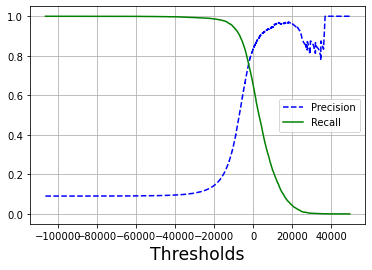

<Figure size 720x216 with 0 Axes>

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.xlabel(xlabel='Thresholds',fontsize='xx-large')
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.grid()
 plt.legend()
 plt.figure(figsize=(10,3))

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [32]:
threshold_90_precision=thresholds[np.argmax(precisions>=90)]

In [33]:
y_train_pred=(y_scores>=thresholds_90_precision)
precision_score(y_train_5,y_train_pred)

NameError: name 'thresholds_90_precision' is not defined

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate

FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate, 
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity

In [36]:
sgd_clf.fit(x_train,y_train)
sgd_clf.predict(some_digit)

array([3])

In [37]:
some_digit_scores = sgd_clf.decision_function(some_digit)
some_digit_scores


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [38]:
 np.argmax(some_digit_scores)



3

In [39]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
sgd_clf.classes_[5]


5

In [41]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict(some_digit)

array([5])

In [42]:
len(ovo_clf.estimators_)

45

In [44]:
forest_clf.fit(X_train, y_train)
forest_clf.predict(some_digit)

NameError: name 'forest_clf' is not defined

Random Forest
classifiers can directly classify instances into multiple classes. You can call
predict_proba() to get the list of probabilities that the classifier assigned to each
instance for each class:

In [ ]:
forest_clf.predict_proba(some_digit)

In [45]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy",n_jobs=-1)

array([0.87365, 0.85835, 0.8689 ])

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy",n_jobs=-1)


array([0.8983, 0.891 , 0.9018])

In [47]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3,n_jobs=-1)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

That’s a lot of numbers. It’s often more convenient to look at an image representation
of the confusion matrix, using Matplotlib’s matshow() function:



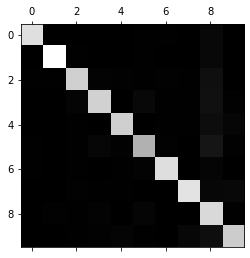

In [48]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks fairly good, since most images are on the main diagonal,
which means that they were classified correctly. The 5s look slightly darker than the
other digits, which could mean that there are fewer images of 5s in the dataset or that
the classifier does not perform as well on 5s as on other digits.

Let’s focus the plot on the errors. First, you need to divide each value in the confusion
matrix by the number of images in the corresponding class, so you can compare error
rates instead of absolute number of errors (which would make abundant classes look
unfairly bad):

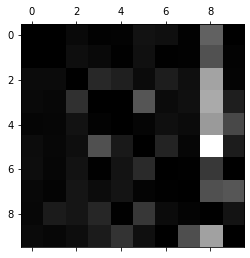

In [49]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
#Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Now you can clearly see the kinds of errors the classifier makes. Remember that rows
represent actual classes, while columns represent predicted classes. The column for
class 8 is quite bright, which tells you that many images get misclassified as 8s. How‐
ever, the row for class 8 is not that bad, telling you that actual 8s in general get prop‐
erly classified as 8s. As you can see, the confusion matrix is not necessarily
symmetrical. You can also see that 3s and 5s often get confused (in both directions).

Or you could engineer new features that would help the classifier—for example, writ‐
ing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has
none). Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or
OpenCV) to make some patterns stand out more, such as closed loops.


The reason is that we used a simple SGDClassifier, which is a linear model. All it
does is assign a weight per class to each pixel, and when it sees a new image it just
sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s
differ only by a few pixels, this model will easily confuse them

In [51]:
#classification system that outputs multiple
#binary tags is called a multilabel classification system.

from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)


KNeighborsClassifier()

There are many ways to evaluate a multilabel classifier, and selecting the right metric
really depends on your project. For example, one approach is to measure the F1 score
for each individual label (or any other binary classifier metric discussed earlier), then
simply compute the average score.

In [52]:
knn_clf.predict(some_digit)


array([[False,  True]])

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

f1_score(y_multilabel, y_train_knn_pred, average="macro")

#This assumes that all labels are equally important,

It is simply a generaliza
tion of multilabel classification where each label can be multiclass (i.e., it can have
more than two possible values)